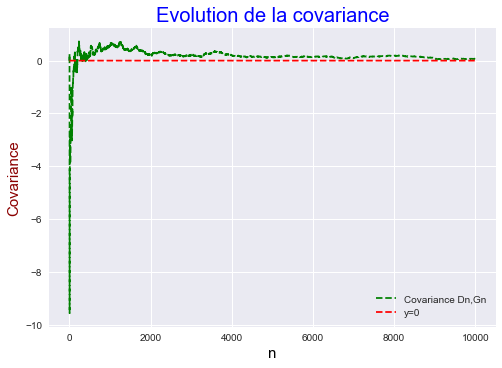

In [3]:
from numpy import *
from random import *
from scipy.stats import binom
import numpy.random as npr
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
import scipy.stats
import numpy as np
from scipy.spatial import ConvexHull, convex_hull_plot_2d



def simulate_loi_d(N):
    tab =[]
    D=np.zeros(N+1)
    D[0]=0
    D[1]=0

#Cas pour le reste 

    for i in range(2,(N+1)):
        p =((i-1)-D[i-1])/(i)
        B=np.random. binomial (1,p,1)
        D[i]=D[i-1]+B
    
    return D[N]

def simulate_loi_g(N):
    G=np.zeros(N+1)
    G[0]=0
    G[1]=0
    G[2]=1
    

    for i in range(3,N+1):
        g2=((i-2)-G[i-1])/i
        g1=2/i
        g0=G[i-1]/i
        
        
        nbaleatoire=random()
        if(nbaleatoire<=g0):
            G[i]=G[i-1]
        ##gauche
        elif(nbaleatoire<=(g0+g1)):
            G[i]=G[i-1]+1
        ##haut
        elif(nbaleatoire<=(g0+g1+g2)):
            G[i]=G[i-1]+2
        
    return G[N]

tab_loi=[]
tab2_loi=[]
tab_cord=[]

tabstockcov=[]
tabindice=[]

def simulate2(repetition,N):
    tabindice.append(0)
    for i in range (1,repetition):
        #Dn
        d=simulate_loi_d(N)
        tab_loi.append(d)
        
        #Gn
        
        g=simulate_loi_g(N)
        tab2_loi.append(g)
        
        #Dn * Gn
        
        cord=d*g
        tab_cord.append(cord)
        
        
        #calcul evol cov
        
        esp_dn=mean(tab_loi)
        esp_gn=mean(tab2_loi)
        esp=mean(tab_cord)
        cov = esp - esp_dn*esp_gn
        
        tabstockcov.append(cov)

        tabindice.append(i)

   
    plt1.style.use('seaborn')
    plt1.figure()
    plt1.title("Evolution de la covariance",fontsize=20,color="blue")
    plt1.xlabel('n',fontsize=15,color="black")
    plt1.ylabel('Covariance',fontsize=15,color="darkred")
    plt1.plot (tabstockcov,'g--',label="Covariance Dn,Gn")
    plt1.plot(tabindice,0 * linspace (1 ,1 ,repetition),'r--',label="y=0")
    plt1.legend()
    plt1.savefig('Convergence_CovarianceClem.png')
    plt1.show
    
simulate2(10000,100)
